In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('merged_select.csv')

In [7]:
columns_list = df.columns.tolist()
print(columns_list)

['per', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ws_per_48', 'bpm', 'vorp', 'season', 'gs', 'mp_per_g', 'fga_per_g', 'fg_pct_x', 'fg3a_per_g', 'fg3_pct', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'pf_per_g', 'pts_per_g', 'age', 'g', 'mp_y', 'avg_dist', 'pct_fga_fg2a', 'pct_fga_00_03', 'pct_fga_03_10', 'pct_fga_10_16', 'pct_fga_16_xx', 'pct_fga_fg3a', 'fg_pct_fg2a', 'fg_pct_00_03', 'fg_pct_03_10', 'fg_pct_10_16', 'fg_pct_16_xx', 'fg_pct_fg3a', 'pct_fga_dunk', 'fg_dunk', 'pct_fg3a_corner3', 'fg_pct_corner3', 'player']


In [10]:
totransform = ['per', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ws_per_48', 'bpm', 'vorp', 'gs', 'mp_per_g', 'fga_per_g', 'fg_pct_x', 'fg3a_per_g', 'fg3_pct', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'pf_per_g', 'pts_per_g', 'age', 'g', 'mp_y', 'avg_dist', 'pct_fga_fg2a', 'pct_fga_00_03', 'pct_fga_03_10', 'pct_fga_10_16', 'pct_fga_16_xx', 'pct_fga_fg3a', 'fg_pct_fg2a', 'fg_pct_00_03', 'fg_pct_03_10', 'fg_pct_10_16', 'fg_pct_16_xx', 'fg_pct_fg3a', 'pct_fga_dunk', 'fg_dunk', 'pct_fg3a_corner3', 'fg_pct_corner3']


In [13]:
numeric_transformer = StandardScaler()

# Create the column transformer
columntransformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, totransform)
    ])

# Apply the preprocessing to the entire dataset
df_scaled = columntransformer.fit_transform(df[totransform])

In [16]:
pca = PCA()
pca.fit(df_scaled)

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

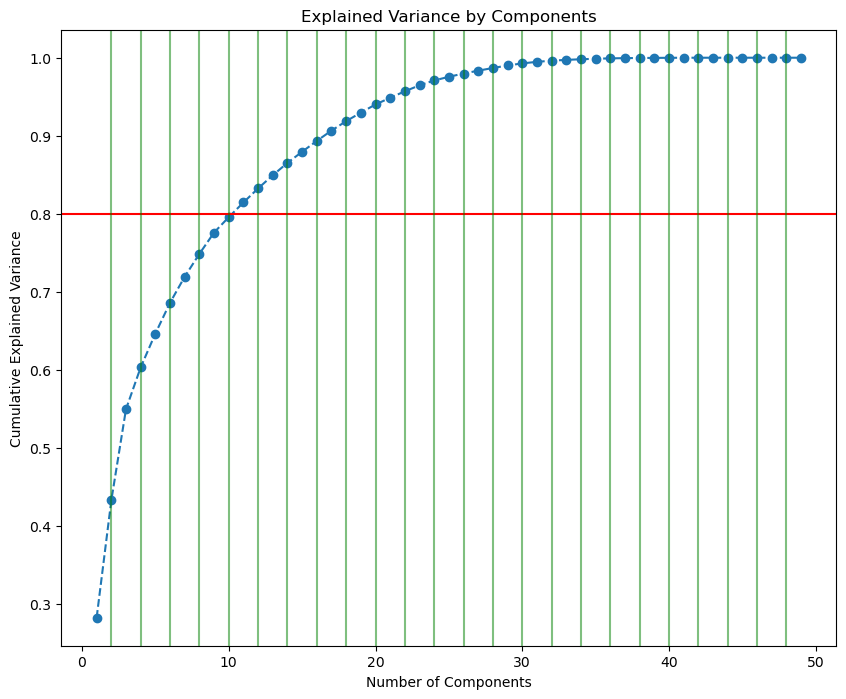

In [23]:
plt.figure(figsize= (10,8))
plt.plot(range(1,50), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.axhline(y=0.8, color='r', linestyle='-', label='80% Explained Variance')
for x in range(2, 50, 2):
    plt.axvline(x=x, color='g', linestyle='-', alpha=0.5)
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [55]:
pca = PCA(n_components = 10)

In [56]:
pca.fit(df_scaled)

PCA(n_components=10)

In [57]:
scores_pca = pca.transform(df_scaled)

In [58]:
wcss = []
for i in range(1,16):
    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

/Users/carterpowell/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carterpowell/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carterpowell/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carterpowell/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

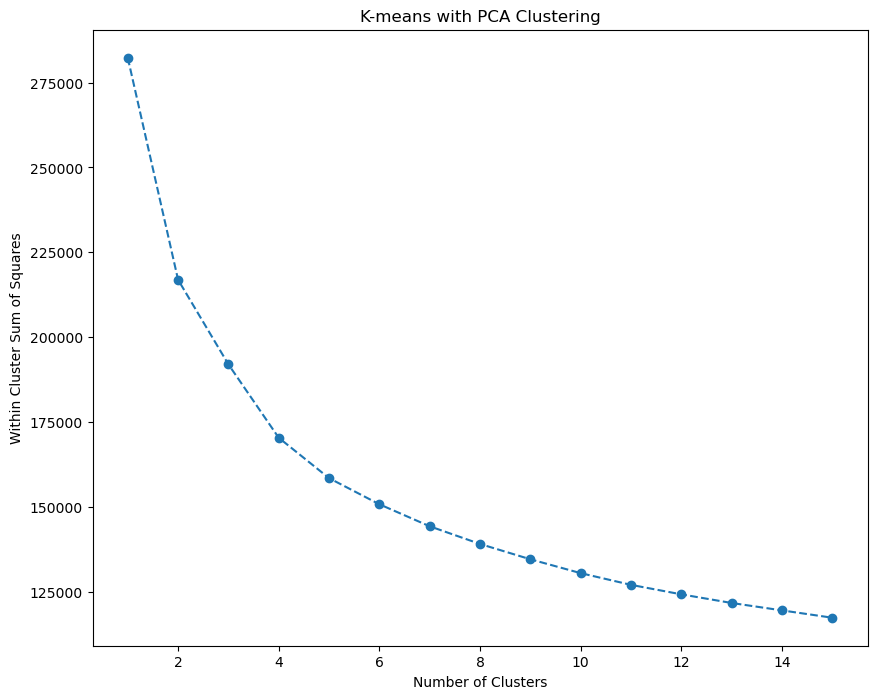

In [59]:
plt.figure(figsize= (10,8))
plt.plot(range(1, 16), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('K-means with PCA Clustering')
plt.show()

In [65]:
kmeans_pca = KMeans(n_clusters = 15, init = 'k-means++', random_state=2)
kmeans_pca.fit(scores_pca)

/Users/carterpowell/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15, random_state=2)

In [66]:
df_cluster = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis=1)
df_cluster.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_cluster['Cluster'] = kmeans_pca.labels_

In [67]:
df_cluster.head()

,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,...,1,2,3,4,5,6,Component 1,Component 2,Component 3,Cluster
0,13.6,0.477,0.036,0.299,10.0,10.0,1.8,1.2,12.7,22.5,...,4.044316,-3.269510,-0.909902,0.312034,-1.482387,-0.879900,-0.242001,-1.071652,0.019382,9
1,20.2,0.547,0.075,0.431,15.3,15.5,1.5,1.9,14.1,25.0,...,2.186290,-1.962455,-2.093952,1.725889,0.232502,0.424021,0.234156,0.413899,-0.546981,4
2,20.6,0.570,0.288,0.282,6.8,17.0,1.9,0.5,10.3,25.6,...,-3.513638,-1.934615,0.521132,1.029521,0.386237,0.355356,0.919814,-0.917100,-0.611714,12
3,4.3,0.310,0.147,0.042,3.7,26.8,1.7,0.0,23.1,15.5,...,3.364855,-6.922003,-0.034919,0.800770,-0.566666,0.295539,-0.053385,1.247904,-0.005025,1
4,13.2,0.505,0.009,0.416,8.6,9.1,1.0,1.5,14.4,24.1,...,3.720341,-3.351356,0.554493,0.038988,-1.827543,-1.470914,0.097794,-0.603400,-0.256305,9


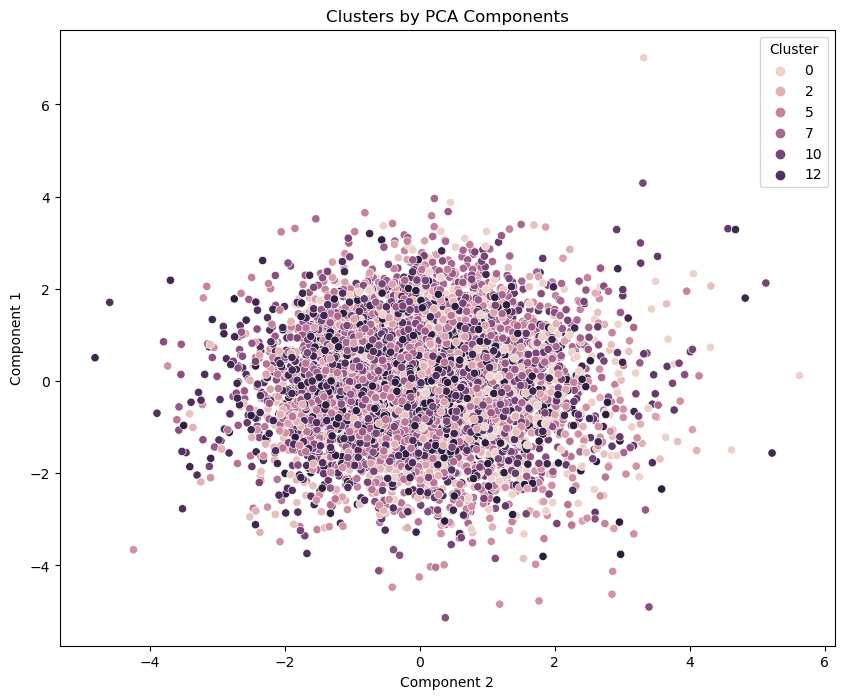

In [70]:
x_axis = df_cluster['Component 2']
y_axis = df_cluster['Component 1']
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_cluster['Cluster'])
plt.title('Clusters by PCA Components')  # Corrected typo here
plt.show()


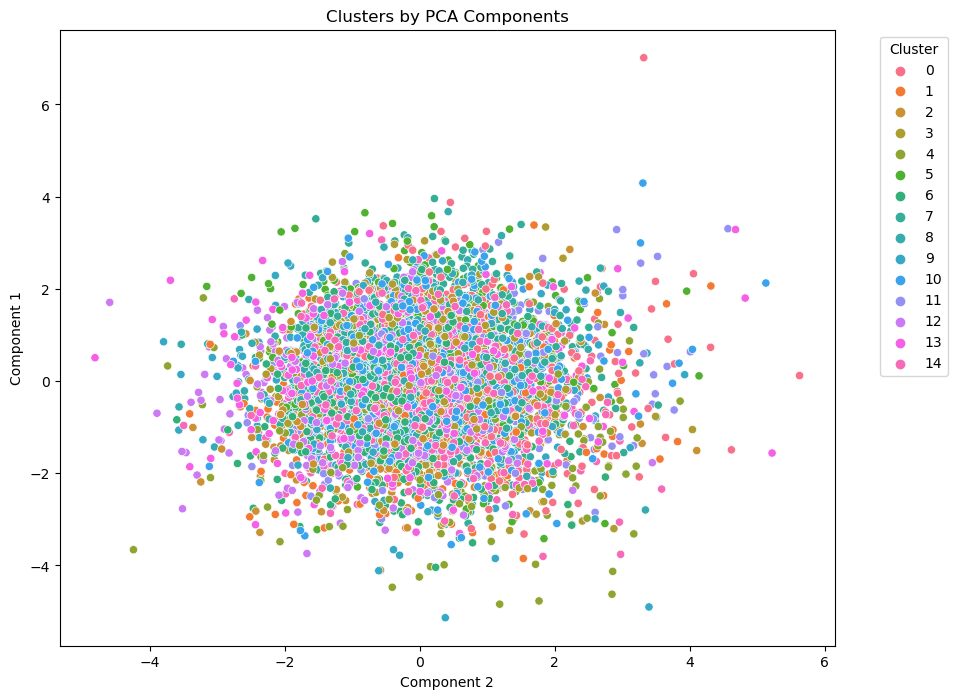

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette with 15 distinct colors
custom_palette = sns.color_palette('husl', 15)

# Define the variables for x and y axes
x_axis = df_cluster['Component 2']
y_axis = df_cluster['Component 1']

# Create the scatter plot with different colors for each cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_cluster['Cluster'], palette=custom_palette)
plt.title('Clusters by PCA Components')
plt.xlabel('Component 2')
plt.ylabel('Component 1')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


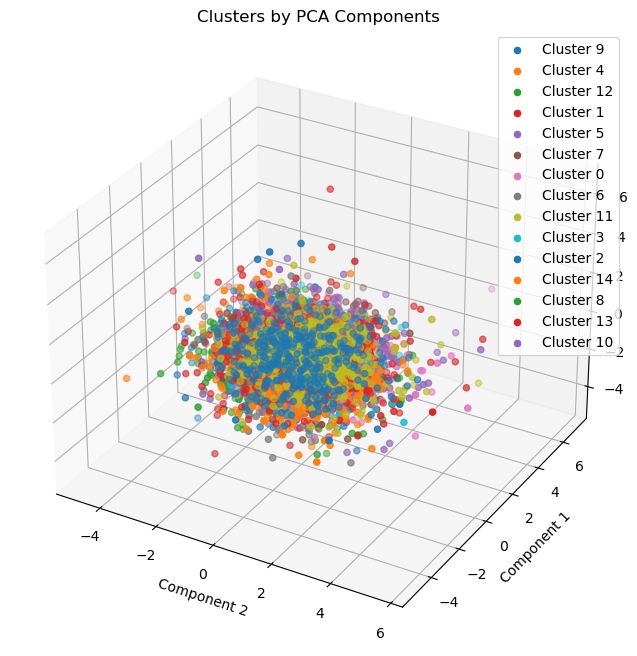

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the variables for x, y, and z axes
x_axis = df_cluster['Component 2']
y_axis = df_cluster['Component 1']
z_axis = df_cluster['Component 3']

# Scatter plot with clusters
for cluster in df_cluster['Cluster'].unique():
    ax.scatter(x_axis[df_cluster['Cluster'] == cluster], 
               y_axis[df_cluster['Cluster'] == cluster], 
               z_axis[df_cluster['Cluster'] == cluster], 
               label=f'Cluster {cluster}')

# Set labels and title
ax.set_xlabel('Component 2')
ax.set_ylabel('Component 1')
ax.set_zlabel('Component 3')
plt.title('Clusters by PCA Components')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [75]:
import plotly.graph_objects as go

# Define the variables for x, y, and z axes
x_axis = df_cluster['Component 2']
y_axis = df_cluster['Component 1']
z_axis = df_cluster['Component 3']

# Define a custom color scale with a different color for each cluster
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#FF5733', '#33FF57', '#5733FF', '#FF3399', '#33FF99']

# Create the interactive 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x_axis,
    y=y_axis,
    z=z_axis,
    mode='markers',
    marker=dict(
        size=3,  # Adjust the size of the markers here
        color=df_cluster['Cluster'],
        colorscale=custom_colors,  # Use the custom color scale
        opacity=0.8
    )
)])

# Set plot title and axis labels
fig.update_layout(title='Interactive 3D Scatter Plot',
                  scene=dict(
                      xaxis_title='Component 2',
                      yaxis_title='Component 1',
                      zaxis_title='Component 3'  # Label the z-axis here
                  ))

# Show the interactive plot
fig.show()
